<a href="https://colab.research.google.com/github/RiccardoRubini93/Garmin_data/blob/main/Read_Garmin_data_from_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install garminconnect

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.0 MB/s eta 0:00:00
  Created wheel for garminconnect: filename=garminconnect-0.1.55-py3-none-any.whl size=13622 sha256=92dac2ee2c1f19661afc0d5e211d2607cb33c07dfee8c5a2c8ed0f2e3de39e35
  Stored in directory: /root/.cache/pip/wheels/8b/dc/11/9aa5c8473be40bed2c4032fded0fa7da63ff844b439681afcb
Successfully built garminconnect


In [2]:
from garminconnect import (
    Garmin,
    GarminConnectAuthenticationError,
    GarminConnectConnectionError,
    GarminConnectTooManyRequestsError,
)

In [3]:
# Authenticate with Garmin Connect
client = Garmin("riru93@gmail.com", "P@ssw0rd")
client.login()

True

In [4]:
# Download a list of activities
activities = client.get_activities(0, 10)  # Download the first 10 activities

In [5]:
# Print the activity names and IDs
for activity in activities:
    print(activity["activityName"], activity["activityId"])

Cogorno Corsa 11917193188
Cogorno Corsa 11917192333
Chiavari Corsa 11917209433
Chiavari Corsa 11903327388
Chiavari Nuoto in acque libere 11903324807
Cogorno Corsa 11876078139
Cogorno Corsa 11876076099
Chiavari Corsa 11876072962
Chiavari Nuoto in acque libere 11869317361
Chiavari Corsa 11869315976


In [6]:
for activity in activities:

  activity_id = activity["activityId"]

  print(f"client.download_activity({activity_id}, dl_fmt=api.ActivityDownloadFormat.ORIGINAL)")
  zip_data = client.download_activity(activity_id, dl_fmt=client.ActivityDownloadFormat.ORIGINAL)
  output_file = f"./{str(activity_id)}.zip"
  with open(output_file, "wb") as fb:
    fb.write(zip_data)
  print(f"Activity data downloaded to file {output_file}")

client.download_activity(11917193188, dl_fmt=api.ActivityDownloadFormat.ORIGINAL)
Activity data downloaded to file ./11917193188.zip
client.download_activity(11917192333, dl_fmt=api.ActivityDownloadFormat.ORIGINAL)
Activity data downloaded to file ./11917192333.zip
client.download_activity(11917209433, dl_fmt=api.ActivityDownloadFormat.ORIGINAL)
Activity data downloaded to file ./11917209433.zip
client.download_activity(11903327388, dl_fmt=api.ActivityDownloadFormat.ORIGINAL)
Activity data downloaded to file ./11903327388.zip
client.download_activity(11903324807, dl_fmt=api.ActivityDownloadFormat.ORIGINAL)
Activity data downloaded to file ./11903324807.zip
client.download_activity(11876078139, dl_fmt=api.ActivityDownloadFormat.ORIGINAL)
Activity data downloaded to file ./11876078139.zip
client.download_activity(11876076099, dl_fmt=api.ActivityDownloadFormat.ORIGINAL)
Activity data downloaded to file ./11876076099.zip
client.download_activity(11876072962, dl_fmt=api.ActivityDownloadForm

In [ ]:
#TODO: implement a method that unpack the zip files and reads them into a dataframes

In [8]:
import zipfile
import os

def unzip_file(zip_file_path, extract_to):
    """
    Unzip a .zip file to a specified directory.

    :param zip_file_path: Path to the .zip file to be extracted.
    :param extract_to: Directory where the contents of the .zip file will be extracted.
    :return: True if the extraction was successful, False otherwise.
    """
    try:
        # Create the destination directory if it doesn't exist
        os.makedirs(extract_to, exist_ok=True)

        # Open the .zip file
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            # Extract all files and directories
            zip_ref.extractall(extract_to)

        print(f"Successfully extracted {zip_file_path} to {extract_to}")
        return True
    except Exception as e:
        print(f"Error extracting {zip_file_path}: {str(e)}")
        return False

# Example usage:
zip_file_path = '11917192333.zip'  # Replace with the path to your .zip file
extract_to = 'unzipped_activity'  # Replace with the directory where you want to extract the contents
unzip_file(zip_file_path, extract_to)


Successfully extracted 11917192333.zip to unzipped_activity


True

In [9]:
pip install fitparse

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fitparse: filename=fitparse-1.2.0-py3-none-any.whl size=68214 sha256=caf62d45ca4ac231cf5f5175b826fbd17f2907a2ac3ef955c7502da05d833f08
  Stored in directory: /root/.cache/pip/wheels/81/67/7b/77a2f8ba348bafbbad6262a80bc51be27b2f9fccbaefc74671
Successfully built fitparse


In [23]:
import fitparse

# Open the .fit file
with fitparse.FitFile('unzipped_activity/11917192333_ACTIVITY.fit') as fitfile:

    # Get all data messages from the file
    messages = fitfile.messages

    # Get all data records from all messages
    data = [m for m in messages if m.name == 'record']

    # Get the fields we're interested in
    fields = ['timestamp', 'distance', 'enhanced_speed', 'heart_rate',
              'cadence','distance','position_lat','position_long','vertical_oscillation',
              'vertical_ratio','stance_time']

    # Create an empty list to hold our data
    data_list = []

    # Go through each record and extract the data
    for record in data:
        record_dict = {}
        for field in fields:
            value = record.get_value(field)
            record_dict[field] = value
        data_list.append(record_dict)

In [25]:
len(data_list)

1870

In [26]:
import numpy as np
import pandas as pd

df = pd.DataFrame(data_list)

In [27]:
df.head(10)

,timestamp,distance,enhanced_speed,heart_rate,cadence,position_lat,position_long,vertical_oscillation,vertical_ratio,stance_time
0,2023-08-31 17:34:01,1.11,0.532,108,0,528969360,111570449,NaN,NaN,NaN
1,2023-08-31 17:34:02,2.89,0.000,108,0,528969198,111570196,NaN,NaN,NaN
2,2023-08-31 17:34:03,7.07,1.082,107,0,528968814,111569811,NaN,NaN,NaN
3,2023-08-31 17:34:04,11.47,1.540,107,0,528968420,111569434,NaN,NaN,NaN
4,2023-08-31 17:34:05,15.15,3.583,107,0,528968077,111569156,NaN,NaN,NaN
5,2023-08-31 17:34:06,20.65,3.863,107,79,528967559,111568781,110.9,7.56,264.0
6,2023-08-31 17:34:07,26.17,4.217,107,79,528967081,111568431,115.1,7.18,255.0
7,2023-08-31 17:34:08,30.46,4.787,109,82,528966668,111568149,114.8,6.56,228.0
8,2023-08-31 17:34:09,35.16,4.787,110,82,528966193,111567896,114.8,6.56,228.0
9,2023-08-31 17:34:10,39.85,4.712,112,82,528965713,111567653,114.2,6.62,230.0


In [28]:
import matplotlib.pyplot as plt

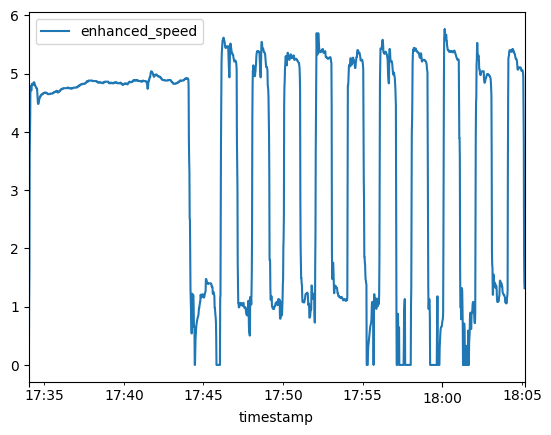

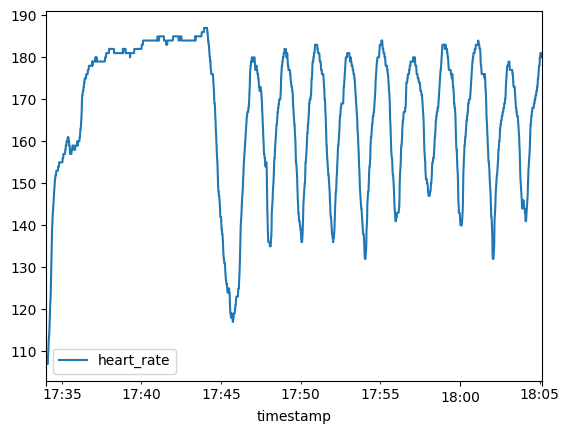

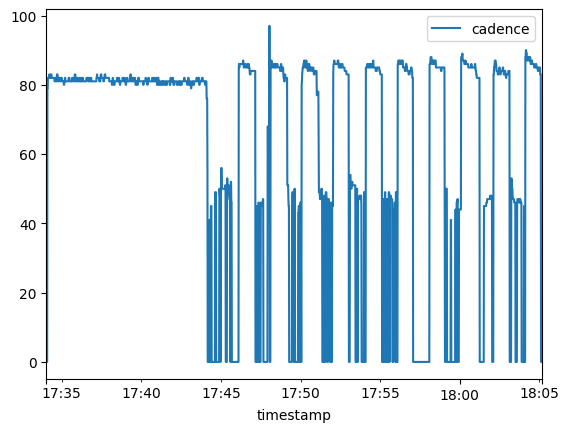

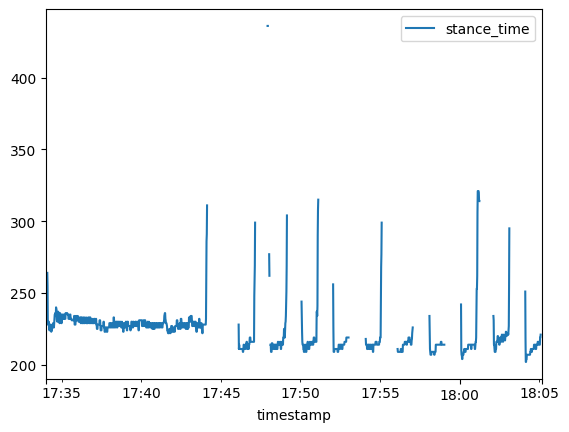

In [30]:
df.plot(x='timestamp', y='enhanced_speed', kind='line')
df.plot(x='timestamp', y='heart_rate', kind='line')
df.plot(x='timestamp', y='cadence', kind='line')
df.plot(x='timestamp', y='stance_time', kind='line')
plt.show()

In [31]:
corr_matrix = df.corr()

<ipython-input-31-b69b4b6a6184>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


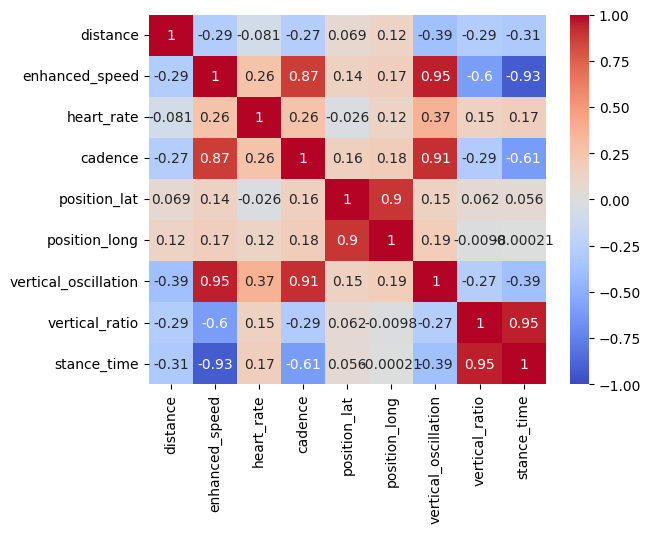

In [32]:
import seaborn as sns

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Display the plot
plt.show()